In [23]:
import pandas as pd
import numpy as np
import os

#save to csvs
kiruna = pd.read_csv(r"/Users/elliotdable/Documents/UCL/research/fabry_perot_ml/data/kiruna_fpi/kiruna_red_full_merged.csv")
sodankyla  = pd.read_csv(r"/Users/elliotdable/Documents/UCL/research/fabry_perot_ml/data/sodankyla_fpi/sodankyla_full_merged.csv")

In [24]:
kiruna.keys()

Index(['datetime', 'date', 'year', 'month', 'day', 'time', 'mirror',
       'lookDirection', 'azimuthAngle', 'intensity', 'intensityError',
       'windSpeed', 'windSpeedError', 'windDirection', 'temp', 'tempError',
       'chiSquared', 'sigToNoiseRatio', 'sensorTemp', 'skyTemp', 'clarity',
       'light', 'rain', 'bartell_srn', 'bartell_day_number', 'Kp_value',
       'ap_value', 'Ap', 'sunspot_number', 'observed_F10.7', 'adjusted_F10.7'],
      dtype='object')

In [25]:
sodankyla

,datetime,date,year,month,day,time,mirror,lookDirection,azimuthAngle,intensity,...,light,rain,bartell_srn,bartell_day_number,Kp_value,ap_value,Ap,sunspot_number,observed_F10.7,adjusted_F10.7
0,2003-02-03 03:17:18,2003-02-03,2003,2,34,03:17:18,3,S,188.0,876.37,...,0.0,0.0,2314,2,3.000,15,22,59,132.5,128.7
1,2003-02-03 05:15:44,2003-02-03,2003,2,34,05:15:44,1,N,8.0,164.10,...,0.0,0.0,2314,2,2.667,12,22,59,132.5,128.7
2,2003-02-03 05:18:14,2003-02-03,2003,2,34,05:18:14,2,E,98.0,152.51,...,0.0,0.0,2314,2,2.667,12,22,59,132.5,128.7
3,2003-02-03 06:05:39,2003-02-03,2003,2,34,06:05:39,3,S,188.0,132.69,...,0.0,0.0,2314,2,2.667,12,22,59,132.5,128.7
4,2003-02-03 16:57:16,2003-02-03,2003,2,34,16:57:16,3,S,188.0,7.92,...,0.0,0.0,2314,2,4.000,27,22,59,132.5,128.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53655,2023-02-14 05:05:19,2023-02-14,2023,2,45,05:05:19,3,S,188.0,11191.33,...,0.0,-0.1,2585,1,2.333,9,6,159,179.7,175.3
53656,2023-02-14 05:06:25,2023-02-14,2023,2,45,05:06:25,15,Sod B,220.0,11006.17,...,0.0,0.0,2585,1,2.333,9,6,159,179.7,175.3
53657,2023-02-14 05:07:32,2023-02-14,2023,2,45,05:07:32,4,W,278.0,11350.52,...,0.0,-0.1,2585,1,2.333,9,6,159,179.7,175.3
53658,2023-02-14 05:08:40,2023-02-14,2023,2,45,05:08:40,14,Sod A,335.0,12052.06,...,0.0,-0.1,2585,1,2.333,9,6,159,179.7,175.3


### Spearmans Rank for Relevant Columns to see if there are any Correlations Between Two Columns

In [26]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

# Function to compute statistical relationships
def compute_relationships(df, alpha=0.05):
    results = []
    df = df.drop(columns=['datetime', 'year', 'mirror', 'lookDirection'] )   
    columns = df.columns
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            col1 = columns[i]
            col2 = columns[j]
            
            # Calculate Spearman rank correlation and p-value
            spearman_corr, spearman_p_value = spearmanr(df[col1], df[col2])
            
            results.append({
                'col1': col1,
                'col2': col2,
                'spearman_correlation': spearman_corr,
                'spearman_p_value': spearman_p_value,
                'significant': spearman_p_value < alpha
            })

    df = pd.DataFrame(results).sort_values(by='spearman_correlation')
    
    return df[df['col1'] != df['col2']]

# Compute relationships
relationship_df = compute_relationships(sodankyla)

/var/folders/pf/x6mn9jt96z14ybg9rxsvmb100000gn/T/ipykernel_96003/2343418662.py:16: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_p_value = spearmanr(df[col1], df[col2])


In [6]:
correlations = relationship_df[abs(relationship_df['spearman_correlation']) > 0.3]
correlations

,col1,col2,spearman_correlation,spearman_p_value,significant
210,skyTemp,clarity,-0.957033,0.0,True
199,sensorTemp,clarity,-0.418160,0.0,True
14,date,rain,-0.315158,0.0,True
223,clarity,bartell_srn,-0.306293,0.0,True
240,rain,bartell_srn,-0.305494,0.0,True
183,chiSquared,observed_F10.7,0.300254,0.0,True
170,temp,adjusted_F10.7,0.307871,0.0,True
184,chiSquared,adjusted_F10.7,0.310811,0.0,True
169,temp,observed_F10.7,0.313901,0.0,True
194,sigToNoiseRatio,Ap,0.320209,0.0,True


#### Plotting correlated values

In [7]:
import matplotlib.pyplot as plt

temps = kiruna.groupby('ap_value')['temp'].mean()
temps.values

array([1406.3366782 , 1428.45506522, 1389.21359038, 1459.10892308,
       1482.64404814, 1383.44090169, 1414.55601578, 1422.36571354,
       1426.12509738, 1475.69584986, 1485.04671277, 1442.91015686,
       1420.41617135, 1539.04142857, 1698.37208955, 1524.35735294,
       1444.89351852, 1598.43396985, 1631.73028   , 1802.15197368,
       1645.67      ])

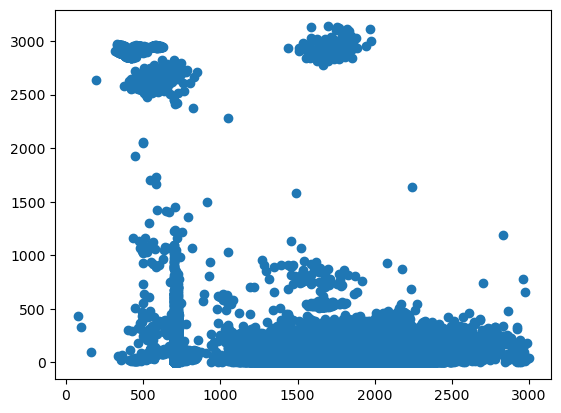

In [8]:
plt.scatter(sodankyla.temp, sodankyla.windSpeed)

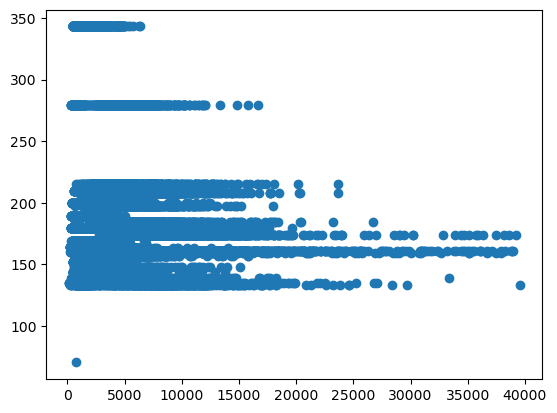

In [9]:
plt.scatter(kiruna.intensity, kiruna['observed_F10.7'])
plt.show()

### Sense Check: Clarity Data

In [10]:
kiruna = kiruna[['date', 'time', 'intensity', 'intensityError',
       'windSpeed', 'windSpeedError', 'temp', 'tempError',
       'chiSquared', 'sigToNoiseRatio', 'clarity',
       'light', 'rain']]
sodankyla = sodankyla[['date', 'time', 'intensity', 'intensityError',
       'windSpeed', 'windSpeedError', 'temp', 'tempError',
       'chiSquared', 'sigToNoiseRatio', 'clarity',
       'light', 'rain']]

#### Check what percentage of databases are affetced when filtering by a certain value of clarity

In [11]:
def clarity_filter(df):
    levels = list(range(10,65,5))
    percent = []
    for level in levels:
        reduced = df[df['clarity'] > level]
        percent.append(100*(len(reduced)/len(df)))
    
    return pd.DataFrame({
        'clarity': levels,
        'percent_of_dataset': percent   
    })

In [12]:
sodankyla_clarity = clarity_filter(sodankyla)
kiruna_clarity = clarity_filter(kiruna)

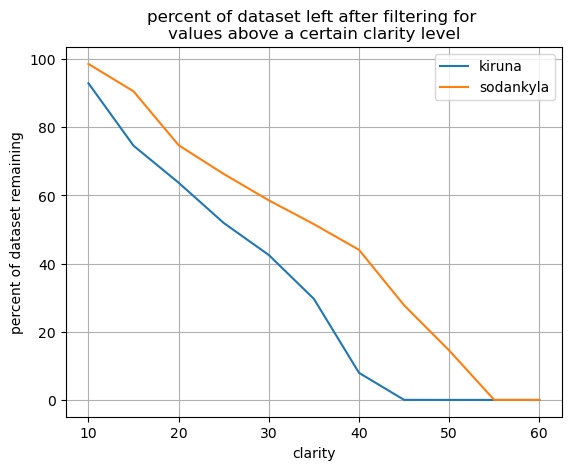

In [13]:
plt.plot(kiruna_clarity.clarity, kiruna_clarity.percent_of_dataset, label='kiruna')
plt.plot(sodankyla_clarity.clarity, sodankyla_clarity.percent_of_dataset, label='sodankyla')
plt.xlabel('clarity')
plt.ylabel('percent of dataset remaining')
plt.title('percent of dataset left after filtering for \nvalues above a certain clarity level')
plt.legend()
plt.grid()
plt.show()

Kiruna loses a lot more data as the clarity increases

#### Plotting Clarity Values on Certain Dates and Checking with Sensor Images on INDRA

In [14]:
#list all of the days where the clarity is less than x in the database
clarity_level = 40
sodankyla_reduced = sodankyla[sodankyla['clarity'] > clarity_level]
kiruna_reduced = kiruna[kiruna['clarity'] > clarity_level]

In [15]:
sodankyla_reduced.date.unique()

array(['2003-02-03', '2003-02-04', '2003-02-05', '2003-02-06',
       '2003-02-07', '2003-02-08', '2003-02-09', '2003-02-10',
       '2003-02-11', '2003-02-12', '2003-02-13', '2003-02-14',
       '2003-02-15', '2003-02-16', '2003-02-17', '2003-02-18',
       '2003-02-19', '2003-02-20', '2003-02-21', '2003-02-22',
       '2003-02-23', '2003-02-24', '2003-02-25', '2003-02-26',
       '2003-02-27', '2003-02-28', '2019-02-01', '2019-02-02',
       '2019-02-03', '2019-02-04', '2019-02-05', '2019-02-06',
       '2019-02-07', '2019-02-15', '2019-02-16', '2019-02-17',
       '2019-02-20', '2019-02-21', '2019-02-22', '2019-02-24',
       '2019-02-25', '2019-02-28', '2020-02-03', '2020-02-04',
       '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-14',
       '2020-02-15', '2020-02-19', '2020-02-20', '2020-02-25',
       '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
       '2020-03-01', '2021-02-03', '2021-02-04', '2021-02-05',
       '2021-02-06', '2021-02-07', '2021-02-08', '2021-

In [16]:
kiruna_reduced.date.unique()

array(['2023-02-01', '2023-02-02', '2023-02-03', '2023-02-04',
       '2023-02-07', '2023-02-10', '2023-02-11', '2023-02-24',
       '2023-02-25', '2023-02-27', '2023-02-28'], dtype=object)

In [17]:
import matplotlib.dates as mdates
from datetime import datetime, time, timedelta

def plot_clarity(df, day):

    # Define the format matching the date string
    date_format = '%Y-%m-%d'

    # Convert to datetime object
    date_object = datetime.strptime(day, date_format)
    oneday = df[df['date'] == day]

    # Calculate the range of the 'adnas' column
    min_value = oneday['clarity'].min()
    max_value = oneday['clarity'].max()
    print(f'Min value: {min_value} \nMax value: {max_value}')

    # Convert string times to datetime.time objects
    time_format = "%H:%M:%S"
    time_data = [datetime.strptime(time_str, time_format).time() for time_str in oneday.time.to_list()]

    # Convert time to timedelta since midnight (to plot them)
    base_date = date_object  # Arbitrary reference date
    datetime_data = [datetime.combine(base_date, t) for t in time_data]

    # Plotting
    fig, ax = plt.subplots(figsize=(18,5))
    ax.plot(datetime_data, oneday.clarity)

    # Set x-ticks to 1-hour intervals
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))

    # Rotate and align the tick labels so they look better
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

    # Set the limits of the x-axis to show the full range of data
    ax.set_xlim([datetime_data[0], datetime_data[-1] + timedelta(hours=0.1)])
    plt.xlabel('time')
    plt.ylabel('clarity')
    plt.title(f'clarity v time for the date: {day}')

    # Show the plot
    plt.show()

Min value: 25.8 
Max value: 49.5


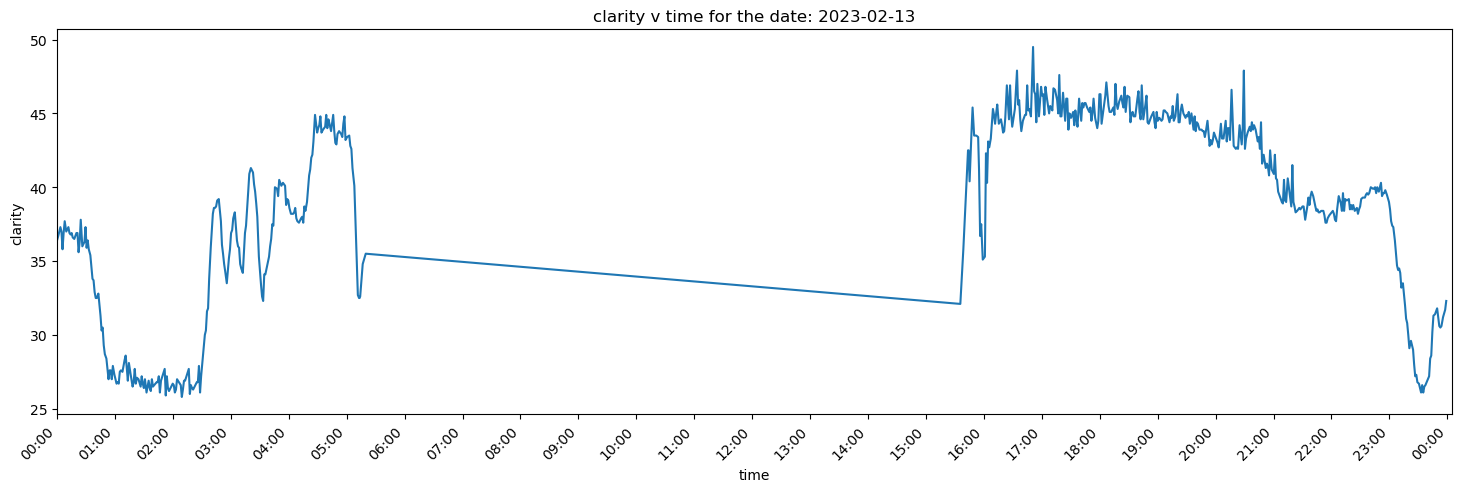

In [18]:
day = '2023-02-13'
plot_clarity(sodankyla, day)

Having cross-referenced certain dates, it seems when the clarity is above 35, the sky is very clear

#### Clarity vs WindSpeed

In [29]:
compute_relationships(sodankyla)
correlations = relationship_df[(relationship_df['col1'] == 'clarity') | (relationship_df['col2'] == 'clarity')]

/var/folders/pf/x6mn9jt96z14ybg9rxsvmb100000gn/T/ipykernel_96003/2343418662.py:16: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, spearman_p_value = spearmanr(df[col1], df[col2])


In [31]:
correlations

,col1,col2,spearman_correlation,spearman_p_value,significant
285,skyTemp,clarity,-0.957033,0.000000e+00,True
274,sensorTemp,clarity,-0.418160,0.000000e+00,True
298,clarity,bartell_srn,-0.306293,0.000000e+00,True
15,date,clarity,-0.293279,0.000000e+00,True
150,intensityError,clarity,-0.293068,0.000000e+00,True
130,intensity,clarity,-0.266376,0.000000e+00,True
235,tempError,clarity,-0.097320,4.641841e-113,True
220,temp,clarity,-0.044965,1.986518e-25,True
187,windSpeedError,clarity,-0.041470,7.242643e-22,True
109,azimuthAngle,clarity,-0.019211,8.571397e-06,True


Doesnt seem to be much of a linear/polynomial relationship between error and clarity

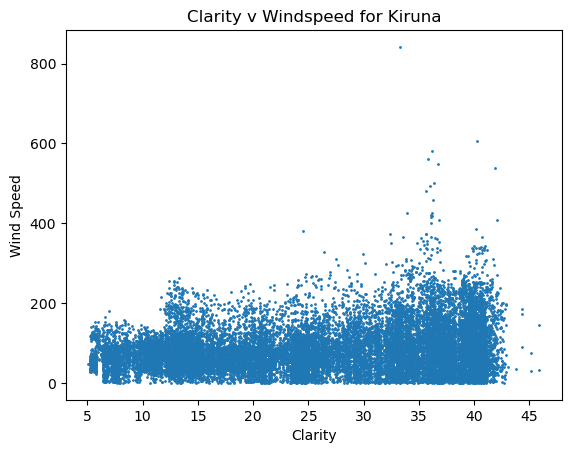

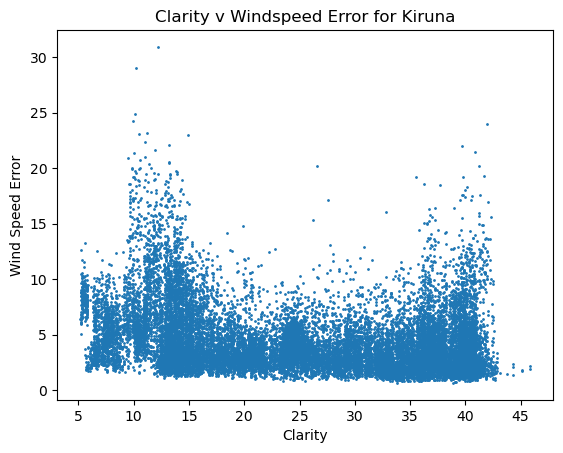

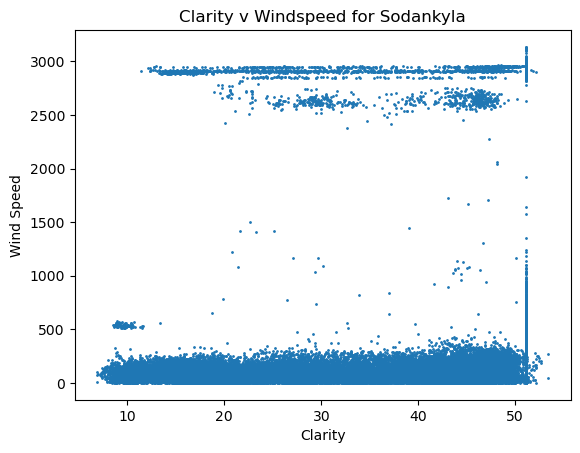

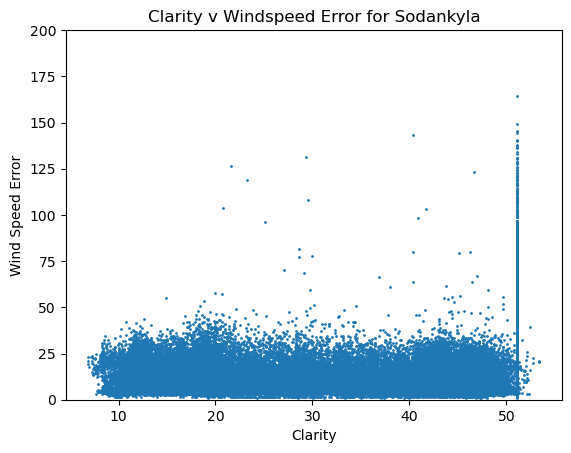

In [53]:
plt.scatter(kiruna.clarity, kiruna.windSpeed,  s=1)
plt.ylabel('Wind Speed')
plt.xlabel('Clarity')
plt.title('Clarity v Windspeed for Kiruna')
plt.show()

plt.scatter(kiruna.clarity, kiruna.windSpeedError,s=1)
plt.ylabel('Wind Speed Error')
plt.xlabel('Clarity')
plt.title('Clarity v Windspeed Error for Kiruna')
plt.show()

plt.scatter(sodankyla.clarity, sodankyla.windSpeed, s=1)
plt.ylabel('Wind Speed')
plt.xlabel('Clarity')
plt.title('Clarity v Windspeed for Sodankyla')
plt.show()

plt.scatter(sodankyla.clarity,sodankyla.windSpeedError, s=1)
plt.ylabel('Wind Speed Error')
plt.ylim(0,200)
plt.xlabel('Clarity')
plt.title('Clarity v Windspeed Error for Sodankyla')
plt.show()

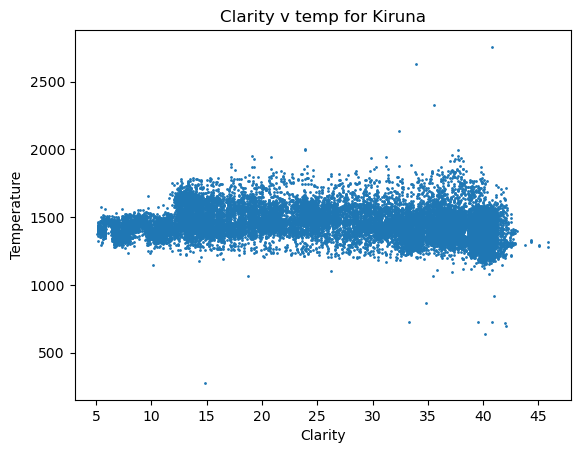

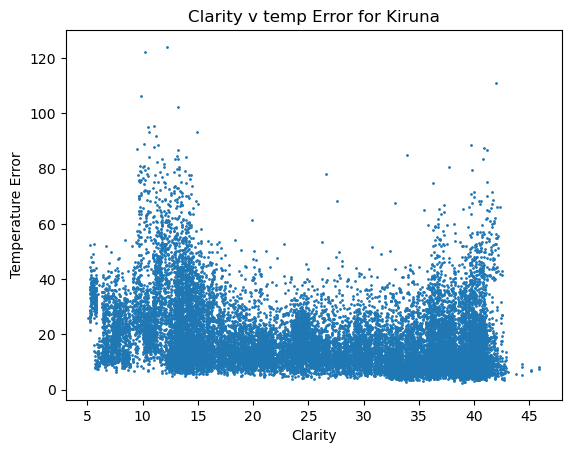

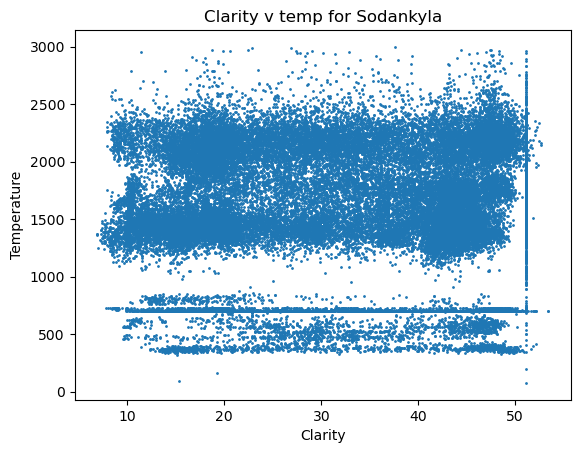

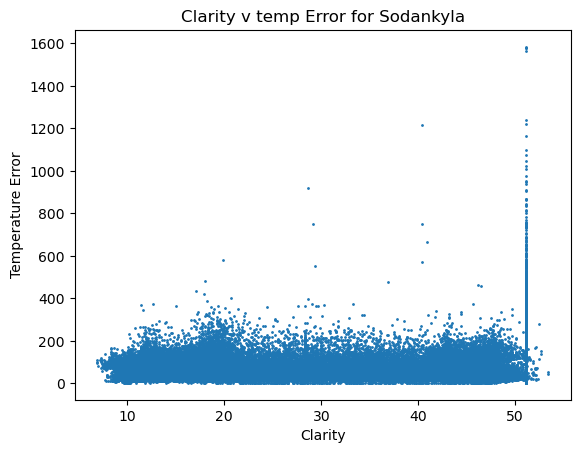

In [52]:
plt.scatter(kiruna.clarity, kiruna.temp,  s=1)
plt.ylabel('Temperature')
plt.xlabel('Clarity')
plt.title('Clarity v temp for Kiruna')
plt.show()

plt.scatter( kiruna.clarity, kiruna.tempError,s=1)
plt.ylabel('Temperature Error')
plt.xlabel('Clarity')
plt.title('Clarity v temp Error for Kiruna')
plt.show()

plt.scatter( sodankyla.clarity, sodankyla.temp, s=1)
plt.ylabel('Temperature')
plt.xlabel('Clarity')
plt.title('Clarity v temp for Sodankyla')
plt.show()

plt.scatter(sodankyla.clarity,sodankyla.tempError, s=1)
plt.ylabel('Temperature Error')
plt.xlabel('Clarity')
plt.title('Clarity v temp Error for Sodankyla')
plt.show()